In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score
import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

In [404]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [405]:
df.shape

(10841, 13)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [407]:
df.drop(columns=['Current Ver','Android Ver','Size','Last Updated'],inplace=True)

In [408]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [409]:
df[df['Content Rating'] == 'Mature 17+']

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,"10,000+",Free,0,Mature 17+,Beauty
133,Dresses Ideas & Fashions +3000,BEAUTY,4.5,473,"100,000+",Free,0,Mature 17+,Beauty
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,"10,000+",Free,0,Mature 17+,Beauty
166,Read books online,BOOKS_AND_REFERENCE,4.1,91615,"5,000,000+",Free,0,Mature 17+,Books & Reference
170,Flybook,BOOKS_AND_REFERENCE,3.9,1778,"500,000+",Free,0,Mature 17+,Books & Reference
...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,100+,Paid,$0.99,Mature 17+,Entertainment
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,"100,000+",Free,0,Mature 17+,Social
10783,Modern Counter Terror Attack – Shooting Game,GAME,4.2,340,"50,000+",Free,0,Mature 17+,Action
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,"5,000,000+",Free,0,Mature 17+,Social


In [410]:
df.duplicated().sum()

np.int64(485)

In [411]:
df.drop_duplicates(inplace=True)

In [412]:
df.dropna(subset=['Rating','Type','Content Rating'],inplace=True)

In [413]:
df.shape

(8890, 9)

In [415]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype(dtype=np.int64)

In [416]:
df["Category"] = df['Category'].str.replace('_',' ')

In [417]:
df['Reviews'] = df['Reviews'].astype(dtype=np.int64)

In [418]:
df.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
1487,Home Decor Showpiece Art making: Medium Diffic...,HOUSE AND HOME,4.3,273,50000,Free,0,Everyone,House & Home
3181,"CheapTickets – Hotels, Flights & Travel Deals",TRAVEL AND LOCAL,4.4,6925,1000000,Free,0,Everyone,Travel & Local
5492,AdventureQuest 3D MMO,FAMILY,4.3,22667,1000000,Free,0,Teen,Role Playing
10814,FR: My Secret Pets!,FAMILY,4.0,785,50000,Free,0,Teen,Entertainment
9347,L.A. Crime Stories 2 Mad City Crime,GAME,4.2,3946,100000,Free,0,Teen,Racing
6524,BN Pro LcdD HD Text,LIBRARIES AND DEMO,4.0,50,5000,Free,0,Everyone,Libraries & Demo
1737,Talking Tom Gold Run,GAME,4.6,2698348,100000000,Free,0,Everyone,Action
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1000000000,Free,0,Everyone,Communication
3157,Free Radar Detector,TRAVEL AND LOCAL,4.3,15680,1000000,Free,0,Everyone,Travel & Local
8191,Peppa Pig: Party Time,FAMILY,3.8,52,10000,Paid,$2.99,Everyone,Educational;Pretend Play


In [419]:
df['Content Rating'].value_counts()

Content Rating
Everyone           7093
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [421]:
df['Content Rating']=df['Content Rating'].str.replace('Everyone 10+','Teen').str.replace('Unrated','Everyone')

In [422]:
df.drop(df[df['Content Rating'] == "Adults only 18+"].index, inplace = True)

In [423]:
df['Content Rating'].value_counts()

Content Rating
Everyone      7094
Teen          1382
Mature 17+     411
Name: count, dtype: int64

In [424]:
df['Price']=df['Price'].str.replace('$','').astype(dtype=float)

In [425]:
df.rename(columns={'Price': 'Price($)'}, inplace=True)


In [426]:
df.value_counts('Type')

Type
Free    8274
Paid     613
Name: count, dtype: int64

Success = Installs >1M  And Rating > 3.8

In [427]:
df['Success']= ((df['Rating'] >=3.8) & (df['Installs'] >=1000000)).astype(np.int64)

In [428]:
df.sample(5)

,App,Category,Rating,Reviews,Installs,Type,Price($),Content Rating,Genres,Success
9055,Human Dx,MEDICAL,4.8,6,500,Free,0.0,Everyone,Medical,0
9734,Dentist Surgery ER Emergency Doctor Hospital G...,FAMILY,3.5,2580,100000,Free,0.0,Everyone,Simulation,0
6296,English Dictionary - Offline,BOOKS AND REFERENCE,4.4,341234,10000000,Free,0.0,Teen,Books & Reference,1
2327,OptumRx,MEDICAL,3.4,1838,100000,Free,0.0,Everyone,Medical,0
3729,"Dailyhunt (Newshunt) - Latest News, Viral Videos",NEWS AND MAGAZINES,4.3,948198,50000000,Free,0.0,Teen,News & Magazines,1


In [482]:
df.drop(df[df['Category'] == '1.9'].index, inplace=True)

In [484]:
df["Category"].nunique()

33

In [420]:
df['Genres'] = df['Genres'].apply(
    lambda x: x.split(';')[1] if isinstance(x, str) and ';' in x else x
)

In [480]:
df['Genres'] = df["Genres"].str.replace("Educational","Education")

In [481]:
df["Genres"].nunique()

51

In [431]:
df_grouped2 = df.groupby(['Category','Genres'], as_index = False).count()
df_grouped2['Category'].value_counts().sum()

np.int64(84)

In [432]:
df[["Success",'Rating','Reviews','Installs']].corr()

,Success,Rating,Reviews,Installs
Success,1.000000,0.236220,0.186598,0.213531
Rating,0.236220,1.000000,0.068746,0.050903
Reviews,0.186598,0.068746,1.000000,0.633425
Installs,0.213531,0.050903,0.633425,1.000000


In [433]:
df.drop(columns = ['Price($)'],inplace = True)

In [434]:
df.sample()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Success
597,Luxy Pro- Elite Dating Single,DATING,3.9,742,50000,Free,Mature 17+,Dating,0


In [435]:
df1 = df.copy()

EDA

<Axes: xlabel='Rating', ylabel='Density'>

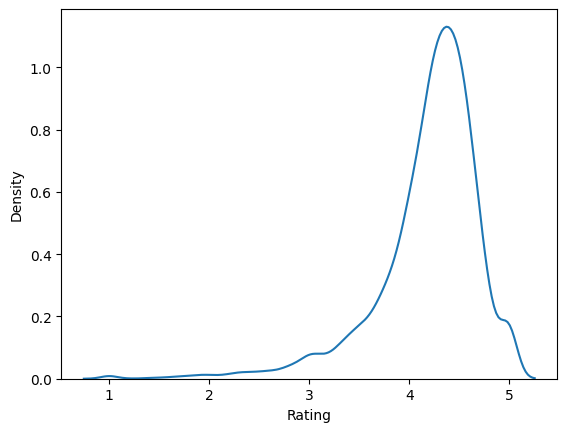

In [436]:
sns.kdeplot(data = df, x = 'Rating')

<Axes: xlabel='Reviews', ylabel='Density'>

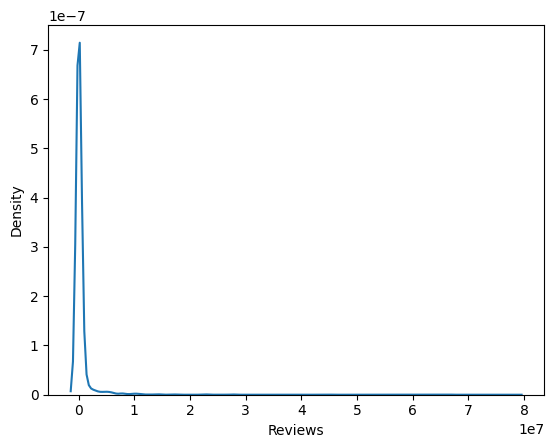

In [437]:
sns.kdeplot(data = df, x = 'Reviews')

In [438]:
df['Reviews'] = np.log1p(df['Reviews'])

<Axes: xlabel='Reviews', ylabel='Density'>

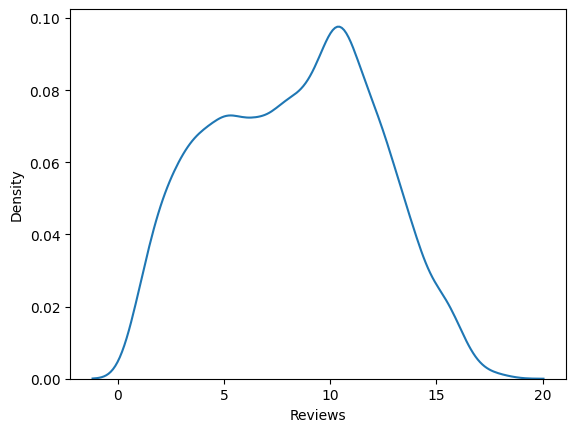

In [439]:
sns.kdeplot(data = df, x = 'Reviews')

<Axes: xlabel='Installs', ylabel='Density'>

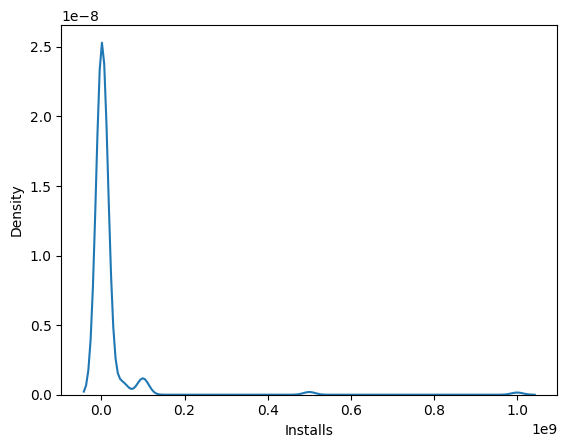

In [440]:
sns.kdeplot(data = df, x = 'Installs')

In [441]:
df['Installs'] = np.log1p(df['Installs'])

<Axes: xlabel='Installs', ylabel='Density'>

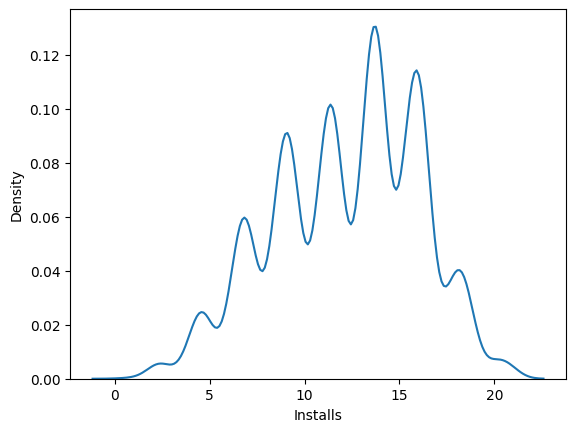

In [442]:
sns.kdeplot(data = df, x = 'Installs')

In [443]:
df[['Success',"Reviews","Installs","Rating"]].corr()

,Success,Reviews,Installs,Rating
Success,1.000000,0.798505,0.781201,0.236220
Reviews,0.798505,1.000000,0.956684,0.207833
Installs,0.781201,0.956684,1.000000,0.114907
Rating,0.236220,0.207833,0.114907,1.000000


<Axes: ylabel='Installs'>

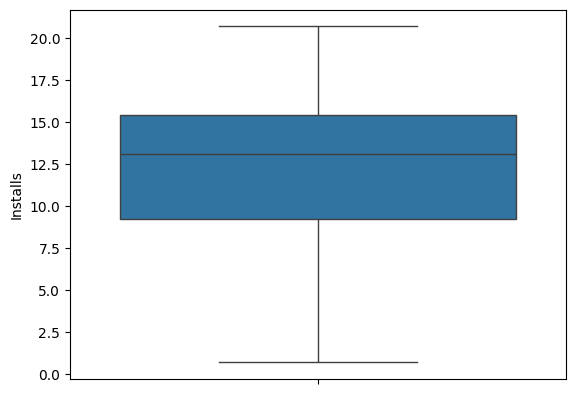

In [444]:
sns.boxplot(df['Installs'])

<Axes: ylabel='Reviews'>

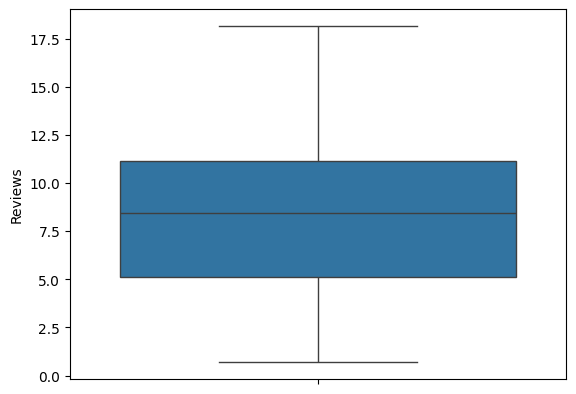

In [445]:
sns.boxplot(df['Reviews'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12676\2160066058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

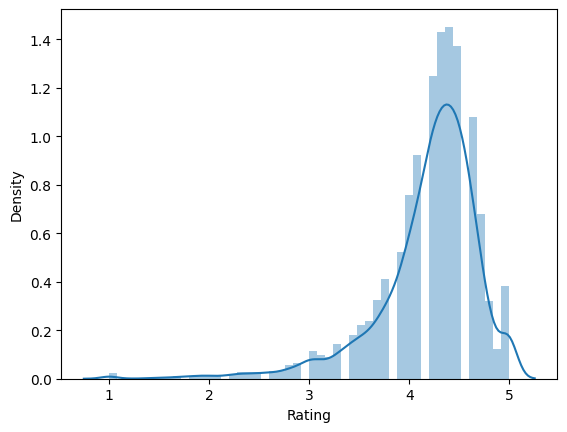

In [446]:
sns.distplot(df['Rating'])

In [447]:
print("Mean value of Rating",df['Rating'].mean())
print("Std value of Rating",df['Rating'].std())
print("Min value of Rating",df['Rating'].min())
print("Max value of Rating",df['Rating'].max())

Mean value of Rating 4.187847417576236
Std value of Rating 0.522477813519274
Min value of Rating 1.0
Max value of Rating 5.0


In [448]:
# Finding the boundary values
upper_limit = df['Rating'].mean() + 3*df['Rating'].std()
lower_limit = df['Rating'].mean() - 3*df['Rating'].std()

In [449]:
lower_limit = 2.6

In [450]:
# Finding the outliers
df[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit)]

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Success
518,Just She - Top Lesbian Dating,DATING,1.9,6.860664,11.512935,Free,Mature 17+,Dating,0
520,EliteSingles – Dating for Single Professionals,DATING,2.5,8.590072,13.122365,Free,Mature 17+,Dating,0
527,Sugar Daddy Dating App,DATING,2.5,5.627621,11.512935,Free,Mature 17+,Dating,0
625,House party - live chat,DATING,1.0,0.693147,2.397895,Free,Mature 17+,Dating,0
663,Just She - Top Lesbian Dating,DATING,1.9,6.861711,11.512935,Free,Mature 17+,Dating,0
...,...,...,...,...,...,...,...,...,...
10458,Candy simply-Fi,LIFESTYLE,2.1,7.779467,11.512935,Free,Everyone,Lifestyle,0
10562,FK Atlantas,SPORTS,1.5,1.098612,1.791759,Free,Everyone,Sports,0
10578,Check Lottery Tickets - Florida,FAMILY,2.0,3.332205,8.517393,Free,Teen,Entertainment,0
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,1.386294,6.216606,Free,Everyone,Tools,0


Capping outlier

In [451]:
df['Rating'] = np.where(
    df['Rating']>upper_limit,
    upper_limit,
    np.where(
        df['Rating']<lower_limit,
        lower_limit,
        df['Rating']
    )
)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12676\2160066058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

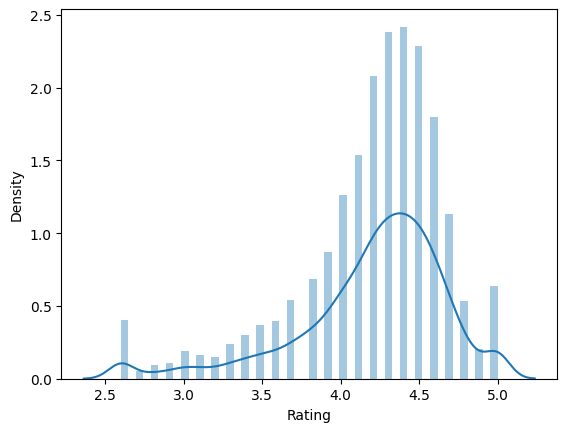

In [452]:
sns.distplot(df['Rating'])

Success Distribuion

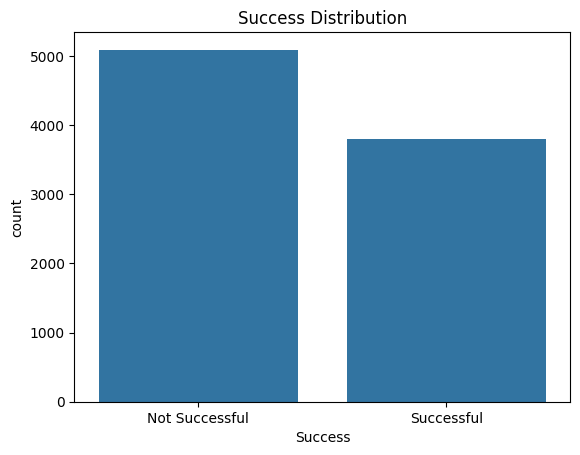

In [453]:
sns.countplot(data=df, x='Success')
plt.title('Success Distribution')
plt.xticks([0, 1], ['Not Successful', 'Successful'])
plt.show()

Rating Vs Success

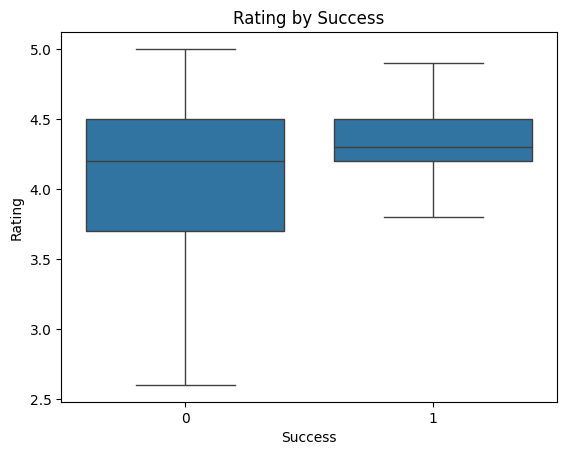

In [454]:
sns.boxplot(data=df, x='Success', y='Rating')
plt.title('Rating by Success')
plt.show()

Installs Vs Success

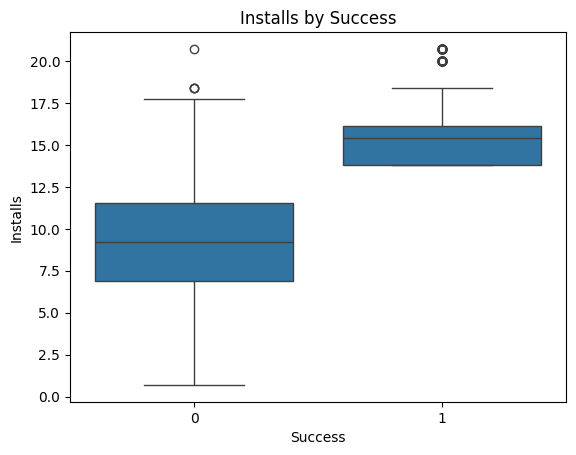

In [455]:
sns.boxplot(data=df, x='Success', y='Installs')
plt.title('Installs by Success')
plt.show()

Reviews Vs Success

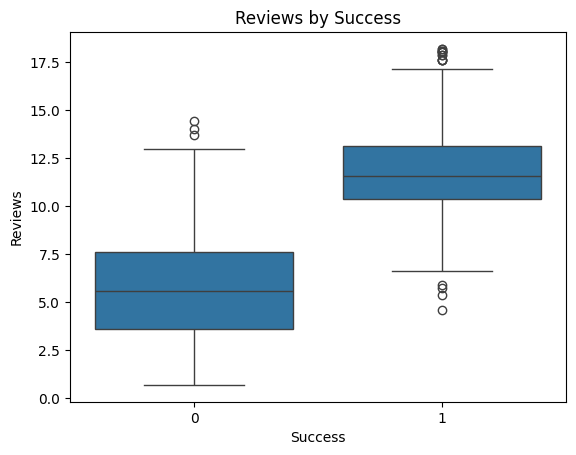

In [456]:
sns.boxplot(data=df, x='Success', y='Reviews')
plt.title('Reviews by Success')
plt.show()

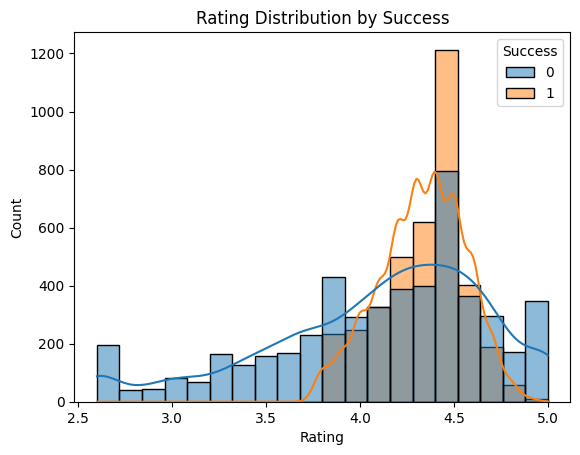

In [457]:
# Distribution of ratings
sns.histplot(data=df, x='Rating', hue='Success', kde=True, bins=20)
plt.title('Rating Distribution by Success')
plt.show()

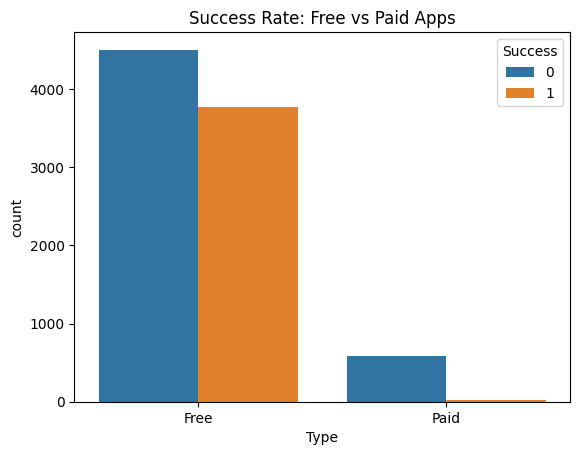

In [458]:
sns.countplot(data=df, x='Type', hue='Success')
plt.xticks([0, 1], ['Free', 'Paid'])
plt.title('Success Rate: Free vs Paid Apps')
plt.show()

In [459]:
df.sample()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Success
569,"SweetRing - Meet, Match, Date",DATING,4.0,10.853194,13.815512,Free,Mature 17+,Dating,1


In [460]:
df['Type'].value_counts()

Type
Free    8274
Paid     613
Name: count, dtype: int64

In [461]:
top_categories = df['Category'].value_counts().head(10).index
filtered_df = df[df['Category'].isin(top_categories)]

Category Analysis

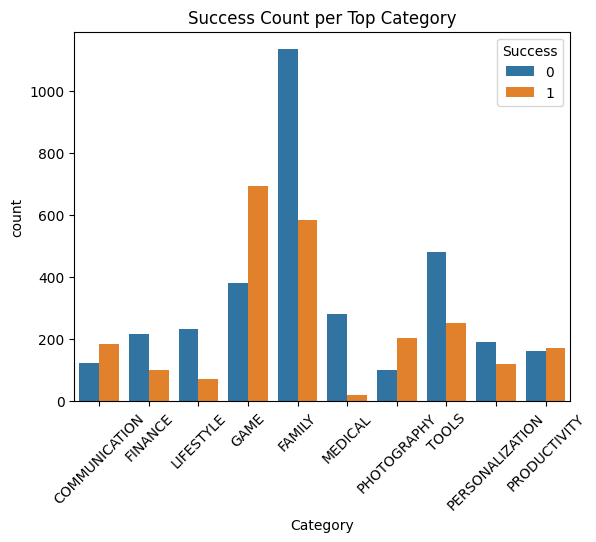

In [462]:
sns.countplot(data=filtered_df, x='Category', hue='Success')
plt.xticks(rotation=45)
plt.title('Success Count per Top Category')
plt.show()

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8887 non-null   object 
 1   Category        8887 non-null   object 
 2   Rating          8887 non-null   float64
 3   Reviews         8887 non-null   float64
 4   Installs        8887 non-null   float64
 5   Type            8887 non-null   object 
 6   Content Rating  8887 non-null   object 
 7   Genres          8887 non-null   object 
 8   Success         8887 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 694.3+ KB


Model Training

In [464]:
X = df1.drop(columns = ['App','Success'])
y = df1['Success']

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size=0.3)

In [466]:
X_train.sample(5)

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres
6994,FAMILY,4.7,12784,1000000,Free,Everyone,Entertainment
7139,FAMILY,5.0,1,10,Free,Everyone,Entertainment
10335,FAMILY,5.0,2,1000,Free,Everyone,Education
10309,FINANCE,4.2,17,5000,Free,Everyone,Finance
4542,GAME,4.3,5682,50000,Paid,Everyone,Arcade


In [467]:
num_feature = ['Rating','Reviews','Installs']

In [468]:
log_transformer = FunctionTransformer(np.log1p, validate=True)

In [469]:
transformer = ColumnTransformer( transformers = [
    ('log', log_transformer,num_feature),
    ('onehotencoder',OneHotEncoder(drop = 'first',handle_unknown='ignore',sparse_output=False),['Category','Type','Content Rating']),
    ('TargetEncoder',ce.TargetEncoder(cols = ['Genres']),["Genres"])
],remainder='passthrough')

In [470]:
pipe = Pipeline(steps = [
    ('transformer',transformer),
    ('LogesticRegression',LogisticRegression())
])

In [471]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['Rating', 'Reviews',
                                                   'Installs']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Category', 'Type',
                                                   'Content Rating']),
                                                 ('TargetEncoder',
                                                  TargetEncoder(cols=['Genres']),
                                                  ['Genres'])])),
                ('LogesticRegression', LogisticRegression())])

In [472]:
y_pred = pipe.predict(X_test)

In [473]:
f1 = f1_score(y_test, y_pred)
f1

0.9575757575757575

In [474]:
accuracy_score(y_test, y_pred)

0.963254593175853

In [475]:
train_accuracy = pipe.score(X_train, y_train)
train_accuracy

0.9638263665594855

In [476]:
import pickle
pickle.dump(pipe,open('model.pkl','wb'))

In [477]:
ans = pickle.load(open('model.pkl','rb'))